# Explaratory Data Analisys

### Placeholder

In [1]:
import numpy as np
import pandas as pd
import ydata_profiling as profiling
import scipy

import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

plt.rcParams["figure.figsize"] = [18, 13]
plt.rcParams["text.usetex"] = False

%matplotlib inline
%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [38]:
data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv")
data.head()

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

In [3]:
profile = profiling.ProfileReport(data, title="Pandas Profiling Report")

In [4]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df = data.copy()

In [40]:
df.drop_duplicates(inplace=True)

df.shape

(53805, 10)

In [41]:
df.reset_index(inplace=True, drop=True)

df.head()

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

In [42]:
df.rename(columns={"'x'": "x", "'y'": "y", "'z'": "z"}, inplace=True)

In [43]:
df['cut'] = df['cut'].replace('Goood', 'Good')

In [44]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [45]:
median_carat = df['carat'].median()

df['carat'].fillna(median_carat, inplace=True)

In [46]:
median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

In [47]:
df["y"].fillna(df["y"].median(), inplace=True)

In [48]:
df.loc[df["cut"] == "Fair", "carat"].max()

5.01

In [49]:
df.loc[(df["table"].between(55, 60, inclusive='both')) & (df["depth"].between(59, 62.5, inclusive='both')), "price"].median()

2215.0

In [50]:
df["price"].median()

2401.0

In [51]:
df["clarity"].value_counts()

clarity
SI1     13035
VS2     12231
SI2      9154
VS1      8157
VVS2     5056
VVS1     3648
IF       1784
I1        740
Name: count, dtype: int64

In [54]:
df["clarity"].value_counts().shape[0]

8

In [55]:
df.loc[df['clarity'].isin(["VVS1", "VVS2"])].shape[0]

8704

<Axes: xlabel='clarity', ylabel='price'>

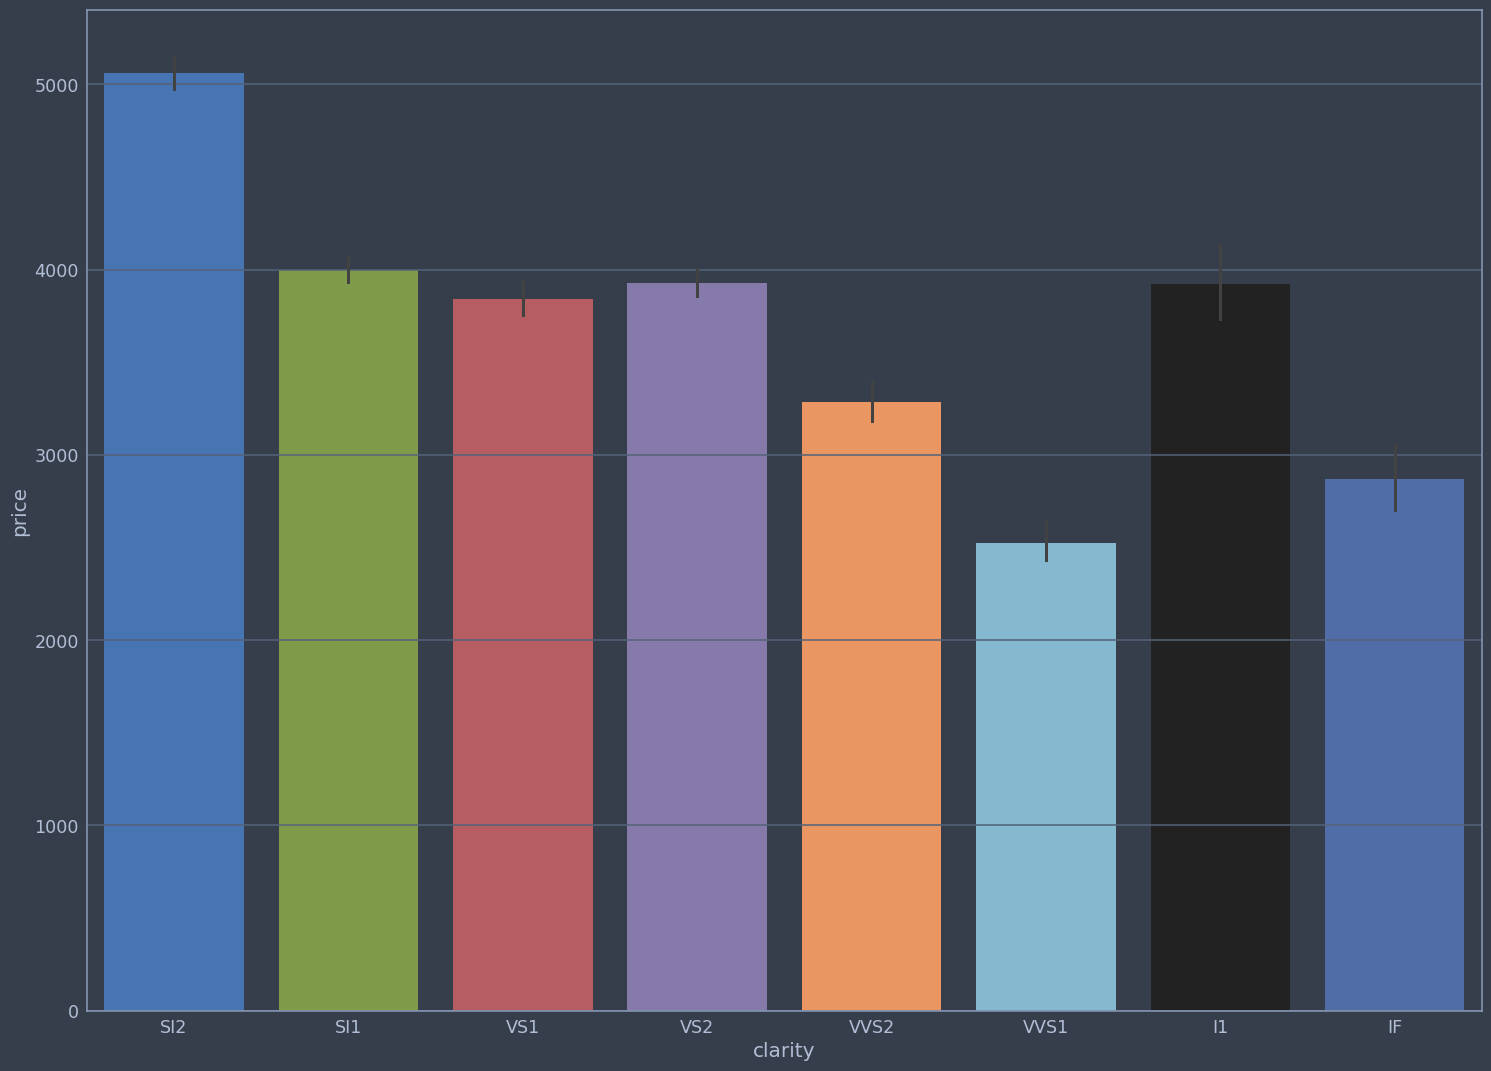

In [52]:
sns.barplot(data=df, x="clarity", y="price")

In [57]:
df.groupby(by=["cut", "clarity"]).agg({"price": ["mean","median"]}).sort_values(by=("price", "mean"), ascending=False)

price        
                          mean  median
cut       clarity                     
Premium   SI2      5556.262491  4292.5
Fair      SI2      5145.740175  3681.0
Very Good SI2      4988.709447  4042.0
Ideal     SI2      4761.711917  4068.0
Good      SI2      4544.119816  3763.0
Premium   VS2      4539.441053  2724.0
          VS1      4491.247730  2362.0
          SI1      4451.865244  3618.0
Very Good IF       4373.299625  1708.0
Ideal     I1       4335.726027  3673.5
Good      VS2      4280.315631  3220.5
Very Good VS2      4217.842758  2727.0
Fair      SI1      4201.818182  3511.0
          VS2      4189.217054  3202.5
          VS1      4165.141176  2829.5
Good      IF       4141.931507  1806.0
Very Good I1       4078.226190  3283.0
Premium   I1       3947.331707  3261.0
Very Good SI1      3936.972136  2810.0
Fair      VVS1     3871.352941  2797.0
Premium   IF       3856.143478  1148.0
Very Good VS1      3805.480813  2326.5
Good      VS1      3799.741248  2427.0
Premium   VVS2     3784.643599  1334.0
Ideal     SI1      3755.110434  2537.0
Fair      I1       3703.533333  2397.0
Good      SI1      3688.387015  2723.0
          I1       3601.810526  3127.0
Ideal     VS1      3490.985179  1815.0
Fair      VVS2     3349.768116  2484.0
Ideal     VS2      3290.504851  1689.0
          VVS2     3256.055212  1334.0
Good      VVS2     3118.108108  1866.5
Very Good VVS2     3037.394652  1032.0
Premium   VVS1     2834.611382  1115.0
Ideal     VVS1     2474.090240  1114.0
Very Good VVS1     2451.883249   941.0
Ideal     IF       2279.618257  1020.0
Good      VVS1     2272.391534   977.0
Fair      IF       1912.333333  1849.0

In [62]:
df.drop(df.loc[(df["x"] == 0.0) | (df["y"] == 0.0) | (df["z"] == 0.0)].index, inplace=True)

<Axes: >

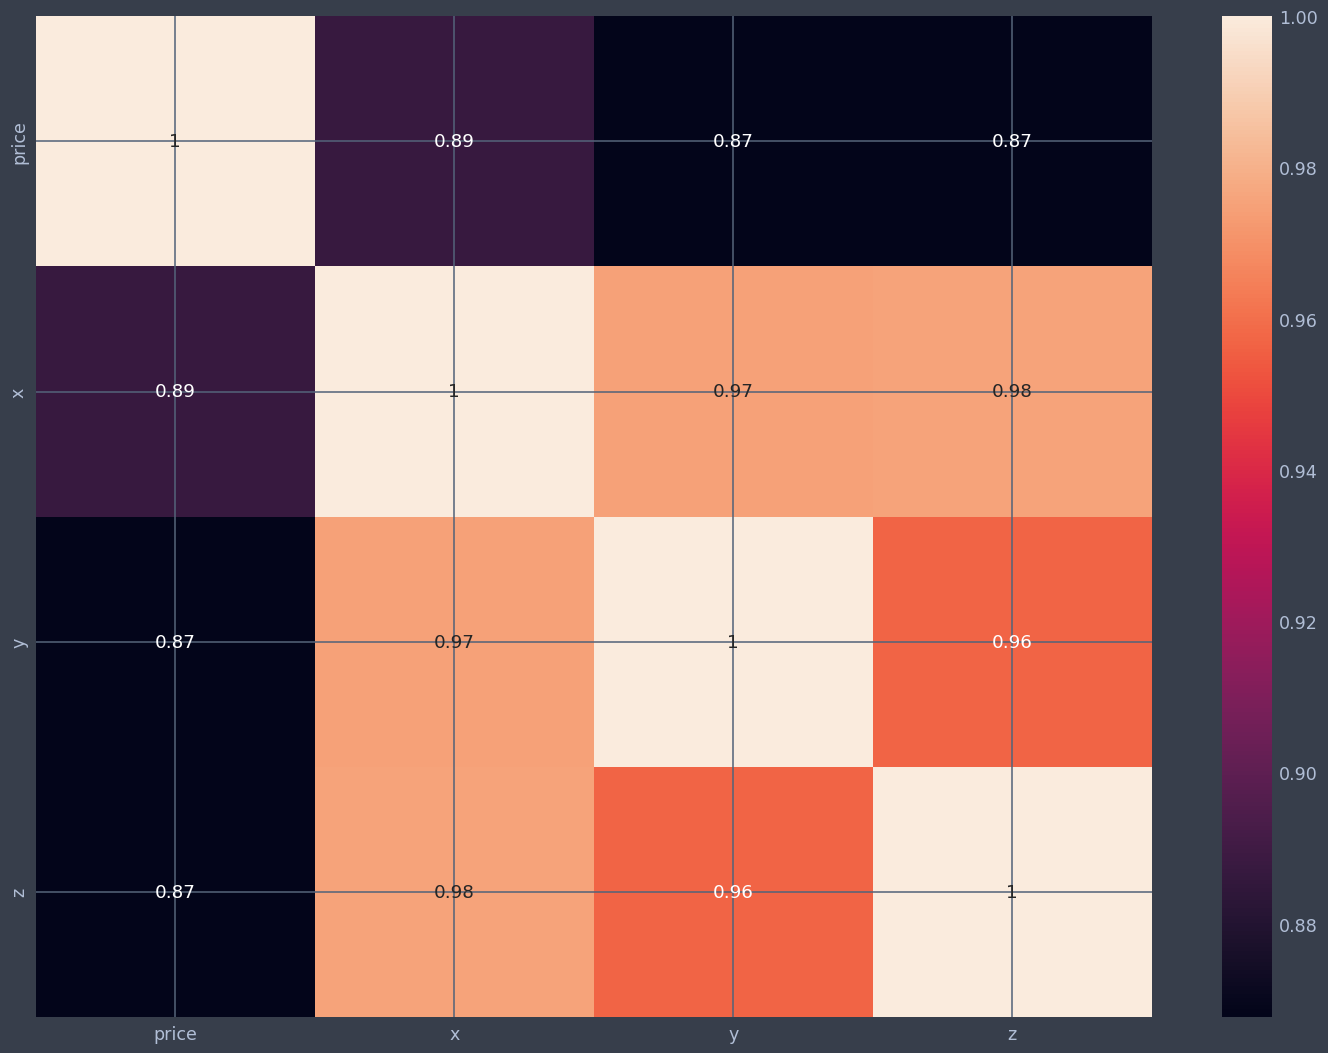

In [66]:
sns.heatmap(df[['price', 'x', 'y', 'z']].corr(), annot=True)

<Axes: xlabel='x', ylabel='price'>

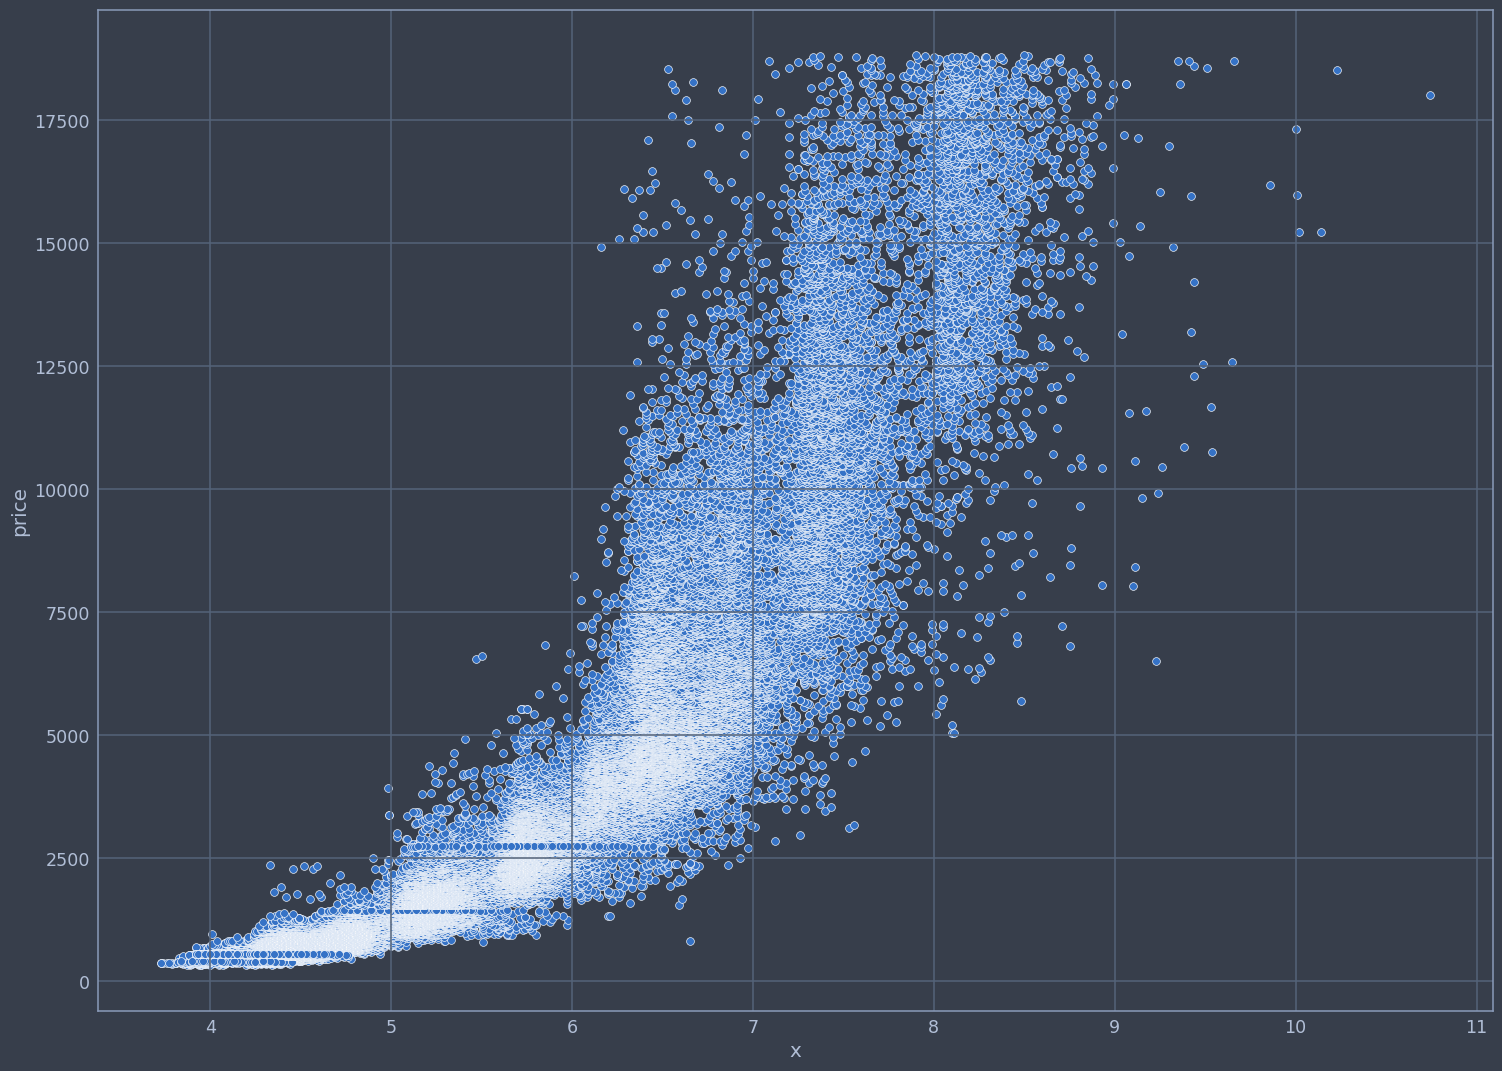

In [67]:
sns.scatterplot(data=df, x="x", y="price")

In [74]:
df.loc[(df["x"] > df["x"].mean()) & (df["y"] > df["y"].mean())].shape[0] / df.shape[0]

0.473784999814078

In [79]:
round(df.loc[(df["carat"] >= 1) & (df["z"] < df["z"].median())].shape[0] / df.loc[(df["carat"] >= 1)].shape[0], 4)

0.0002

In [81]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<Axes: xlabel='color', ylabel='price'>

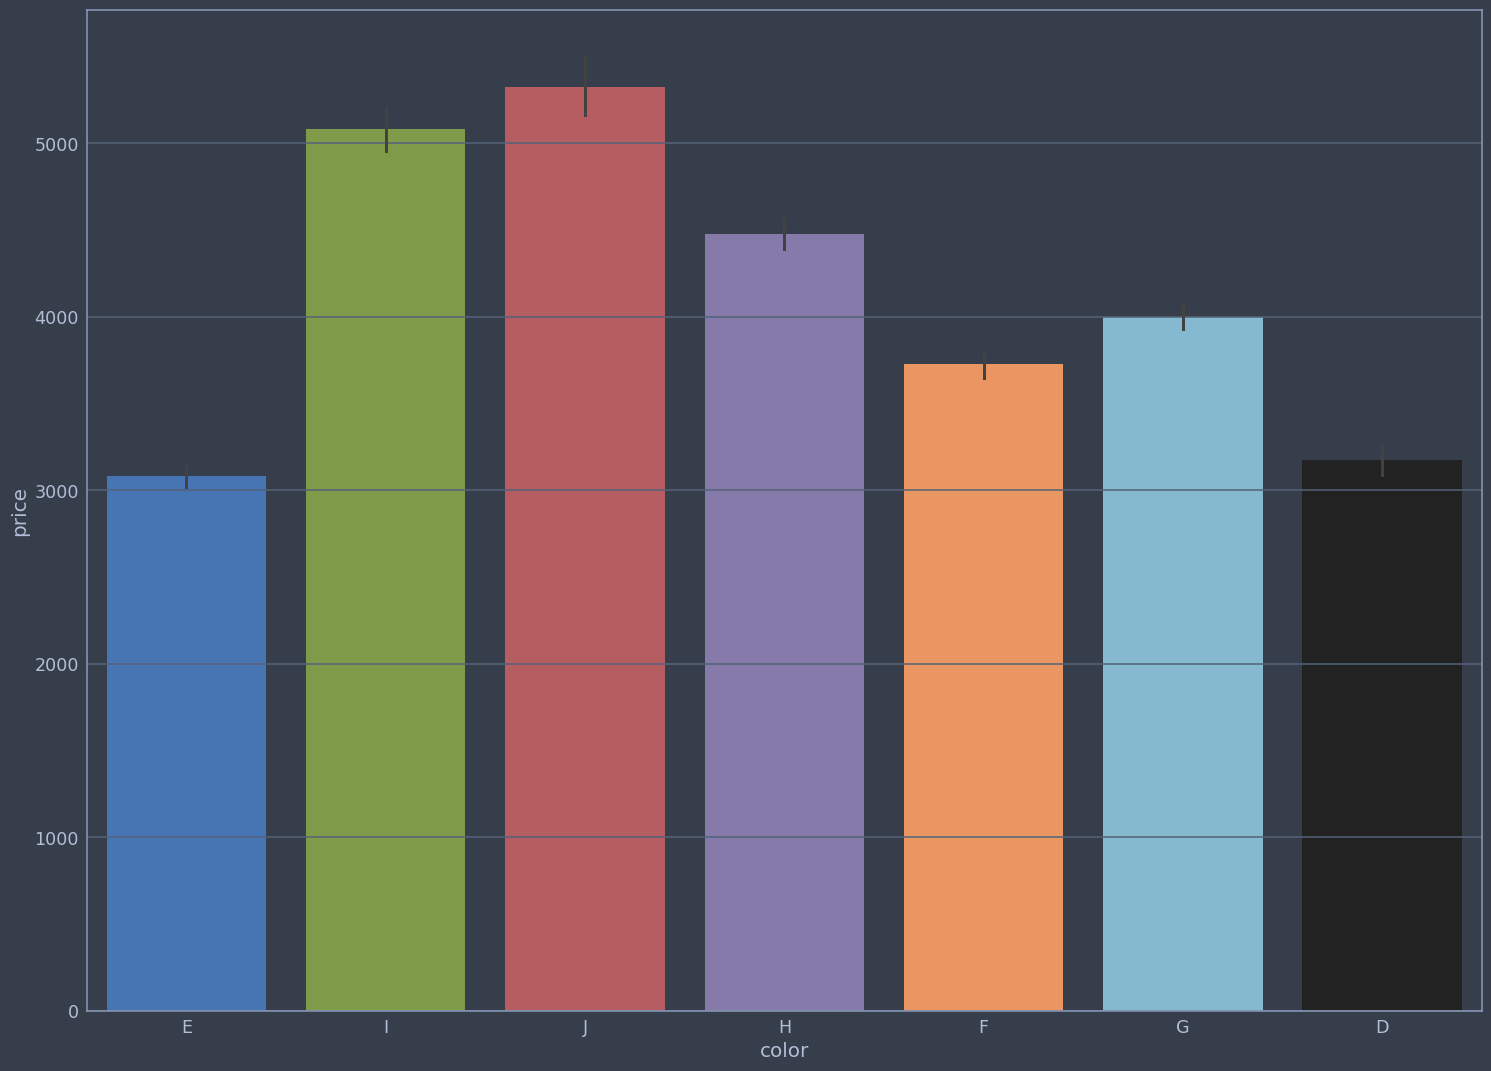

In [82]:
sns.barplot(data=df, x="color", y="price")

In [85]:
df.groupby(by=["color"]).agg({"price": ["mean","median"], "carat":["mean","median"]}).sort_values(by=("price", "median"), ascending=False)

price             carat       
              mean  median      mean median
color                                      
J      5326.415418  4234.5  1.159340   1.11
I      5082.220229  3721.5  1.020457   1.00
H      4478.859734  3449.5  0.908474   0.90
F      3726.495587  2345.0  0.736262   0.70
G      3999.417466  2242.0  0.769698   0.70
D      3172.262768  1842.0  0.658617   0.54
E      3079.382224  1741.0  0.657815   0.54

In [87]:
df.groupby(by=["cut", "color", "clarity"]).agg({"price": ["mean"]}).sort_values(by=("price", "mean"), ascending=False)

price
                                 mean
cut       color clarity              
Very Good D     IF       10298.260870
Good      D     IF       10030.333333
Ideal     J     I1        9454.000000
Premium   D     IF        9056.500000
          J     SI2       7550.285714
...                               ...
Good      E     IF        1519.222222
Ideal     I     IF        1509.404255
Fair      G     IF        1488.000000
Premium   H     VVS1      1453.758929
Very Good J     IF        1074.125000

[276 rows x 1 columns]